In [1]:
'''
activation
활성화 함수 : linear(선형회귀) : 연속적인 값에 대한 결과를 가져올 때 
             sigmoid(참/거짓:이항) : 렐루(ReLU), 
                                    하이퍼볼릭 탄젠트(hyperbolic tangent) 
                                    소프트플러스(softplus) 
             softmax(다항분류 : 출력결과가 여러개인 경우) : 0.2 + 0.6 + 0.3 = 1 :최고값이 답
loss              
손실 함수 : 평균제곱 오차(mse) : mean_squared_error 
           평균절대 오차(mae)
           평균절대백분율오차(mape)
           평균제곱로그오차(msle) 
           이항교차엔트로피(binary_crossentropy):이항분류
           범주형교차엔트로피(calegorical_crossentropy) : 다항분류
optimizer           
오차 수정 함수: 경사 하강법(gd) : 확률적경사하강법(sgd) : 아다그라이드(adagrad) : 알엠에스프롭(RMSProp) : 아담(adam)
                                                       모멘텀(momentum)                            : 아담(adam)
metrics                                                                                                   : 네스레포트 모멘텀(NAG) 
모델 수행의 결과 출력 :  
            accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력 
            loss : 학습셋에 대한 손실 값을 나타냄
            val_acc : 테스트셋에 대한 정확도를 나타냄
            val_loss : 테스트셋에 대한 손실 값을 나타냄
'''
print()              

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#데이터를 불러 옴
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/house_train.csv")
df
# NaN확인
df.isnull().sum().sort_values(ascending=False).head(20)
# 원-핫 인코딩
#카테고리형 변수를 0과 1로 이루어진 변수
df = pd.get_dummies(df)
#결측치를 각 칼럼의 평균으로 대체
df = df.fillna(df.mean())
# 속성과 클래스로 분리
cols_train = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
x_train_pre = df[cols_train]
y = df['SalePrice'].values

# 학습 셋과 테스트 셋을 만들기
x_train,x_test,y_train,y_text = train_test_split(x_train_pre , y , test_size = 0.2)


#모델의 구조를 설정합니다
# 노드의 수를 늘리면
#   모델은 더 다양하고 복잡한 특징과 패턴을 학습할 수 있음
#   노드 수를 무작정 늘리면 과적합의 위험이 증가할 수 있음
#   노드 수가 많을수록 모델의 계산 비용이 증가함
#   데이터의 특성, 문제의 복잡성, 사용 가능한 훈련 데이터 양 등을 고려하여 노드 수를 조절해야 함.
# 노드 수를 정하는 법
#   교차 검증, 그리드 서치, 경험적 방법
#   자동화된 하이퍼 파라미터 최적화 도구 사용
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

# 모델 실행
model.compile(optimizer ='adam', loss = 'mse')

# 20회 이상 결과가 향상되지 않는다면, 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

# 모델의 이름을 정하기.
modelpath="./data/model/house.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=0, save_best_only=True)

# 검증 셋 : 25% 로 제작
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,validation_split=0.25,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
 1/28 [>.............................] - ETA: 37s - loss: 30972727296.0000

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 2s 26ms/step - loss: 38917079040.0000 - val_loss: 40274350080.0000
Epoch 2/2000
28/28 [==============================] - 0s 6ms/step - loss: 38395449344.0000 - val_loss: 39507025920.0000
Epoch 3/2000
28/28 [==============================] - 0s 6ms/step - loss: 37276131328.0000 - val_loss: 37833605120.0000
Epoch 4/2000
28/28 [==============================] - 0s 6ms/step - loss: 34858983424.0000 - val_loss: 34287038464.0000
Epoch 5/2000
28/28 [==============================] - 0s 6ms/step - loss: 29926270976.0000 - val_loss: 27488718848.0000
Epoch 6/2000
28/28 [==============================] - 0s 6ms/step - loss: 21643902976.0000 - val_loss: 16971505664.0000
Epoch 7/2000
28/28 [==============================] - 0s 6ms/step - loss: 11307194368.0000 - val_loss: 6494029312.0000
Epoch 8/2000
28/28 [==============================] - 0s 6ms/step - loss: 4309574144.0000 - val_loss: 2231245312.0000
Epoch 9/2000
28/28 [==============================] - 0

In [75]:
# SalePrice의 예측 값
y_prediction=model.predict(x_test)
y_prediction

10/10 [==============================] - 0s 1ms/step


array([[204532.94 ],
       [122602.4  ],
       [160159.19 ],
       [224046.86 ],
       [178346.34 ],
       [139525.31 ],
       [160613.66 ],
       [194910.2  ],
       [181755.05 ],
       [132000.73 ],
       [285582.1  ],
       [191993.4  ],
       [147158.25 ],
       [195212.75 ],
       [109772.1  ],
       [186803.27 ],
       [223099.61 ],
       [141260.44 ],
       [286072.47 ],
       [145527.77 ],
       [122892.555],
       [198795.08 ],
       [143185.95 ],
       [158386.7  ],
       [233749.28 ],
       [194944.05 ],
       [148509.78 ],
       [148410.19 ],
       [179394.16 ],
       [246045.66 ],
       [158318.53 ],
       [218004.   ],
       [196240.83 ],
       [153163.77 ],
       [170673.31 ],
       [186096.92 ],
       [136576.48 ],
       [140205.53 ],
       [213061.05 ],
       [135548.55 ],
       [210333.9  ],
       [214069.22 ],
       [169816.17 ],
       [229441.03 ],
       [143720.   ],
       [226655.17 ],
       [195190.67 ],
       [24015

In [76]:
# 시각화를 위해 실제 값과 예측 값을 저장
real_price = []
pred_price = []
x_num = []
count = 0

for i in range(25):
    real = y_text[i]
    prediction = y_prediction[i]
    print(f'실측값 : {real:.2f},예측값 : {prediction[0]:.2f}\n')
    real_price.append(real)
    pred_price.append(prediction)
    count += 1
    x_num.append(count)

실측값 : 167000.00,예측값 : 204532.94

실측값 : 144000.00,예측값 : 122602.40

실측값 : 178900.00,예측값 : 160159.19

실측값 : 228950.00,예측값 : 224046.86

실측값 : 149700.00,예측값 : 178346.34

실측값 : 115000.00,예측값 : 139525.31

실측값 : 184000.00,예측값 : 160613.66

실측값 : 110000.00,예측값 : 194910.20

실측값 : 127000.00,예측값 : 181755.05

실측값 : 132500.00,예측값 : 132000.73

실측값 : 265979.00,예측값 : 285582.09

실측값 : 136900.00,예측값 : 191993.41

실측값 : 107500.00,예측값 : 147158.25

실측값 : 219500.00,예측값 : 195212.75

실측값 : 64500.00,예측값 : 109772.10

실측값 : 185850.00,예측값 : 186803.27

실측값 : 143000.00,예측값 : 223099.61

실측값 : 164500.00,예측값 : 141260.44

실측값 : 340000.00,예측값 : 286072.47

실측값 : 155000.00,예측값 : 145527.77

실측값 : 119900.00,예측값 : 122892.55

실측값 : 180500.00,예측값 : 198795.08

실측값 : 129500.00,예측값 : 143185.95

실측값 : 132250.00,예측값 : 158386.70

실측값 : 154300.00,예측값 : 233749.28



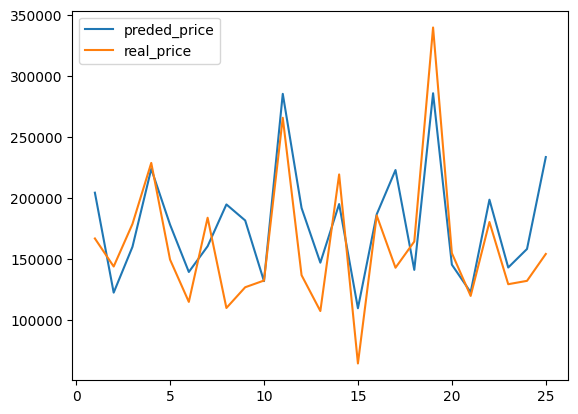

In [77]:
import matplotlib.pyplot as plt
plt.plot(x_num,pred_price,label = 'preded_price')
plt.plot(x_num,real_price,label = 'real_price')
plt.legend()
plt.show()

In [78]:
from tensorflow.keras.datasets import mnist
# mnist 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [79]:
x_train.shape[0] # 60000
x_test.shape[0] # 10000
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

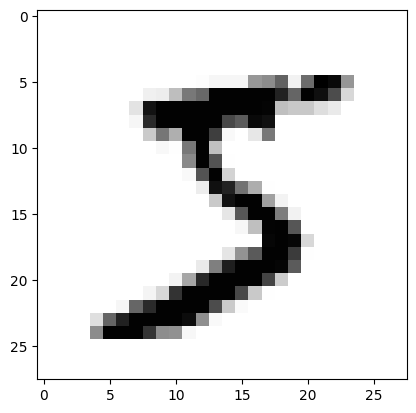

In [80]:
# 받아온 배열중 0번을 확인
plt.imshow(x_train[0],cmap='Greys')
plt.show()

In [82]:
# 밑의 sys를 사용하기 위해 import
import sys
for x in x_train[0]:
    for i in x:
        sys.stdout.write('%-3s'%i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [83]:
# 원-핫 인코딩을 사용하기위해 import 해줌.
from tensorflow.keras.utils import to_categorical

x_train[0]

# 차원 변환 > 
x_train = x_train.reshape(x_train.shape[0],784)
x_train = x_train.astype('float64')
x_train = x_train / 255
x_train.shape

x_test = x_test.reshape(x_test.shape[0],784)
x_test = x_test.astype('float64')
x_test = x_test / 255
x_test.shape

# 속성 : x_train[0]
# class : y_train[0]
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [85]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [94]:
# MNIST 데이터 불러오기
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 차원 변환 > 
x_train = x_train.reshape(x_train.shape[0],784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0],784).astype('float32') / 255

# 원-핫 인코딩
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 모델 최적화
modelpath = './data/model/MNIST_MLP.hdf5'
early_stop = EarlyStopping(monitor='val_loss',patience=10)
check_point = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=0,save_best_only=True)

# 모델 학습      / validation_split은 모델 최적화를 위해 필요함!
history = model.fit(x_train,y_train,validation_split=0.25,epochs=30,batch_size=200,verbose=1,callbacks=[early_stop,check_point])

Epoch 1/30
225/225 [==============================] - 2s 6ms/step - loss: 0.3367 - accuracy: 0.9069 - val_loss: 0.1862 - val_accuracy: 0.9470
Epoch 2/30
225/225 [==============================] - 1s 5ms/step - loss: 0.1436 - accuracy: 0.9575 - val_loss: 0.1347 - val_accuracy: 0.9601
Epoch 3/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0962 - accuracy: 0.9733 - val_loss: 0.1126 - val_accuracy: 0.9679
Epoch 4/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0723 - accuracy: 0.9800 - val_loss: 0.0965 - val_accuracy: 0.9714
Epoch 5/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0526 - accuracy: 0.9856 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0400 - accuracy: 0.9897 - val_loss: 0.0847 - val_accuracy: 0.9759
Epoch 7/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0312 - accuracy: 0.9920 - val_loss: 0.0875 - val_accuracy: 0.9736
Epoch 

In [93]:
# 테스트 셋 정확도 확인
model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9802


0.9801999926567078

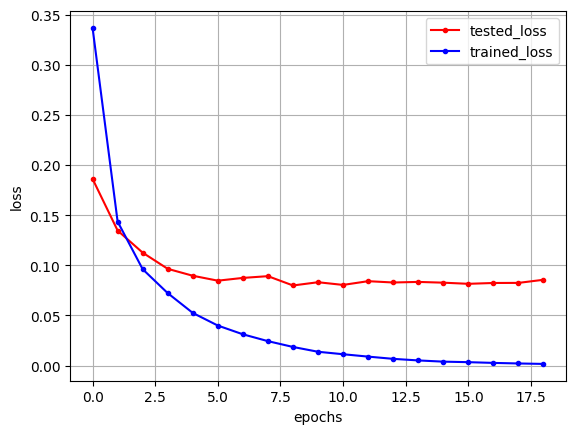

In [104]:
y_val_loss = history.history['val_loss']     # 테스트 셋
y_loss = history.history['loss']     # 학습 셋
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_val_loss,marker='.',c='red',label='tested_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='trained_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 텍스트 전처리와 관련한 함수
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전처리할 텍스트
text = '해보지 않으면 해낼 수 없다'

# 해당 텍스트를 토큰화
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼', '수', '없다']

In [113]:
# 전처리하려는 세 개의 문장을 정함
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.','텍스트의 단어로 토큰화해야 딥러닝에서 인식됨.','토큰화한 결과는 딥러닝에서 사용할 수 있음.']
token = Tokenizer()
token.fit_on_texts(docs)

# 빈도수를 확인
token.word_counts

# 문장의 갯수 확인
token.document_count

# 각 단어의 인덱스 확인
token.word_index

{'텍스트의': 1,
 '딥러닝에서': 2,
 '먼저': 3,
 '각': 4,
 '단어를': 5,
 '나누어': 6,
 '토큰화': 7,
 '합니다': 8,
 '단어로': 9,
 '토큰화해야': 10,
 '인식됨': 11,
 '토큰화한': 12,
 '결과는': 13,
 '사용할': 14,
 '수': 15,
 '있음': 16}

In [121]:
text = '먼저 텍스트의 각 단어를 나누어 토큰화 합니다.'
token = Tokenizer()
token.fit_on_texts([text])
token.word_index
token.word_index['먼저']    # 단어가 키가 된다
x = token.texts_to_sequences([text])

# 원-핫 인코딩 배열 만들기
x = to_categorical(x,len(token.word_index) +1)
x

array([[[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [148]:
# 텍스트 리뷰 자료
docs = ['너무 재밌네요','최고예요','참 잘 만든 영화예요','추천하고 싶은 영화입니다','한번 더 보고 싶네요','글쎄요','별로예요','생각보다 지루하네요','연기가 어색해요','재미없어요']

# 긍정 리뷰는 1, 부정 리뷰는 0
classes = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
token.word_index

# index만 출력
x = token.texts_to_sequences(docs)
x

# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 준다 : pad_sequences
padding_x = pad_sequences(x,4)
padding_x

# 임베딩
# 입력될 단어의 수
word_size = len(token.word_index) + 1
# 단어 임베딩을 포함하여 딥러닝 모델을 만들어줌
model = Sequential()
model.add(Embedding(word_size,8,input_length=4))
model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))

# 모델 실행    손실 수정 함수    손실 함수
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(padding_x,classes,epochs=20,verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 505ms/step - loss: 0.7067 - accuracy: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 0.7043 - accuracy: 0.3000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.7019 - accuracy: 0.3000
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6995 - accuracy: 0.3000
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6971 - accuracy: 0.3000
Epoch 6/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.6000
Epoch 10/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.7000
Epoch 11/20
1/1 [====================

In [152]:
text = '재밌어요'
x_text = token.texts_to_sequences([text])

padded_x_text = pad_sequences(x_text,4)
result = model.predict(padded_x_text)

print(result)
if result[0][0] >= 0.5:
    print(f'{text}는 긍정적임.')
else:
    print(f'{text}는 부정적임.')

1/1 [==============================] - 0s 20ms/step
[[0.4911344]]
재밌어요는 부정적임.
